# Holiday Sales Data Exploration
## Data Stats
- 231483 rows, 17 columns
- numeric_cols:  ['fact_id', 'store_id', 'dept', 'is_holiday', 'temperature', 'fuel_price', 'weekly_sales', 'cpi', 'unemployment', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'size', 'type', 'month']
- date_cols: ['date']
- Min date: 2010-02-05 00:00:00, Max date: 2012-10-26 00:00:00

## Transformations for EDA
- Converted date column to datetime
- Retained only rows where ~df['date'].isna()


In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
# %%
# My eda boilerplate - part 1 - SETTING UP
print ("Running eda boilerplate on df...")

# Import pandas, seaborn, matplotlib, numpy and create df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import csv to df
df = pd.read_csv("retail_clean.csv")
print(df.head())

# categorical columns
categorical_cols = list(df.select_dtypes('object').columns)
print('~'*10, 'categorical_cols:', '~'*10, '\n', categorical_cols)

# numeric columns
numeric_cols = list(df.select_dtypes('number').columns)
print('~'*10, 'numeric_cols:', '~'*10, '\n', numeric_cols)


# date columns
date_cols = [col for col in df.columns 
             if pd.api.types.is_datetime64_any_dtype(df[col]) or "date" in col.lower()]
print('~' * 10, 'date_cols:', '~' * 10, '\n', date_cols)


# drop duplicates
print("Checking effect of dropping duplicates...")
print("Original dataset info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df.info())
df_dropped_duplicates = df.drop_duplicates()
print("Dropped duplicates info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_dropped_duplicates.info())

# Check for nas
print("Checking for nas...")
print(df.isna().sum())




Running eda boilerplate on df...
   fact_id  store_id  dept        date  is_holiday  temperature  fuel_price  \
0        0         1     1  2010-02-05           0        42.31       2.572   
1        1         1    26  2010-02-05           0        42.31       2.572   
2        2         1    17  2010-02-05           0        42.31       2.572   
3        3         1    45  2010-02-05           0        42.31       2.572   
4        4         1    28  2010-02-05           0        42.31       2.572   

   weekly_sales         cpi  unemployment  markdown1  markdown2  markdown3  \
0      24924.50  211.096358      8.106000        0.0        0.0        0.0   
1      11737.12  211.096358      8.106000        0.0        0.0        0.0   
2      13223.76  211.096358      8.106000        0.0        0.0        0.0   
3         37.44  211.096358      7.500052        0.0        0.0        0.0   
4       1085.29  211.096358      7.500052        0.0        0.0        0.0   

   markdown4      size 

In [6]:
# Drop rows with missing dates
df2 = df[~df['date'].isna()]
df2

,fact_id,store_id,dept,date,is_holiday,temperature,fuel_price,weekly_sales,cpi,unemployment,markdown1,markdown2,markdown3,markdown4,size,type,month
0,0,1,1,2010-02-05,0,42.31,2.572,24924.50,211.096358,8.106000,0.0,0.0,0.0,0.0,151315.0,3.0,2.0
1,1,1,26,2010-02-05,0,42.31,2.572,11737.12,211.096358,8.106000,0.0,0.0,0.0,0.0,151315.0,3.0,2.0
2,2,1,17,2010-02-05,0,42.31,2.572,13223.76,211.096358,8.106000,0.0,0.0,0.0,0.0,151315.0,3.0,2.0
3,3,1,45,2010-02-05,0,42.31,2.572,37.44,211.096358,7.500052,0.0,0.0,0.0,0.0,151315.0,3.0,2.0
4,4,1,28,2010-02-05,0,42.31,2.572,1085.29,211.096358,7.500052,0.0,0.0,0.0,0.0,151315.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231517,232414,24,8,2011-05-06,0,55.75,4.192,49471.07,134.514367,8.212000,0.0,0.0,0.0,0.0,203819.0,3.0,5.0
231518,232415,24,50,2011-05-06,0,55.75,4.192,1210.00,134.514367,8.212000,0.0,0.0,0.0,0.0,203819.0,3.0,5.0
231519,232416,24,87,2011-05-06,0,55.75,4.192,25893.32,134.514367,8.212000,0.0,0.0,0.0,0.0,203819.0,3.0,5.0
231520,232417,24,85,2011-05-06,0,55.75,4.192,1357.83,134.514367,8.212000,0.0,0.0,0.0,0.0,203819.0,3.0,5.0


In [7]:
# Convert date to datetime
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231483 entries, 0 to 231521
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   fact_id       231483 non-null  int64         
 1   store_id      231483 non-null  int64         
 2   dept          231483 non-null  int64         
 3   date          231483 non-null  datetime64[ns]
 4   is_holiday    231483 non-null  int64         
 5   temperature   231483 non-null  float64       
 6   fuel_price    231483 non-null  float64       
 7   weekly_sales  231483 non-null  float64       
 8   cpi           231483 non-null  float64       
 9   unemployment  231483 non-null  float64       
 10  markdown1     231483 non-null  float64       
 11  markdown2     231483 non-null  float64       
 12  markdown3     231483 non-null  float64       
 13  markdown4     231482 non-null  float64       
 14  size          231482 non-null  float64       
 15  type          231482 n

In [8]:
# Export df2 as retail_w.csv
df2.to_csv('retail_w.csv', index=False )

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of fact_id column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


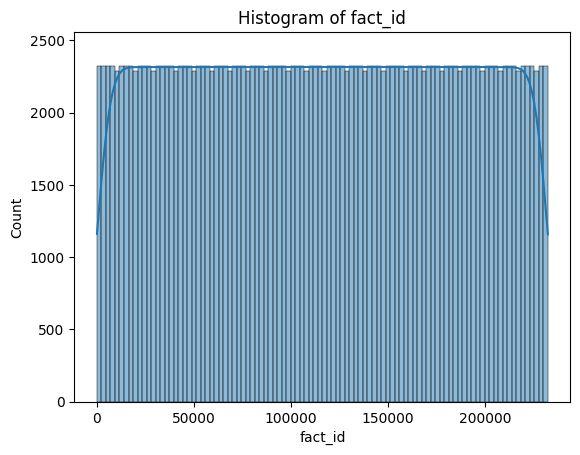

Description of fact_id ~~~~~~~~~~
count    231522.000000
mean     116199.648975
std       67099.098064
min           0.000000
25%       58075.250000
50%      116189.500000
75%      174303.750000
max      232418.000000
Name: fact_id, dtype: float64

Value counts of fact_id ~~~~~~~~~~
fact_id
0         1
1         1
2         1
3         1
4         1
         ..
232414    1
232415    1
232416    1
232417    1
232418    1
Name: count, Length: 231522, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of store_id column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


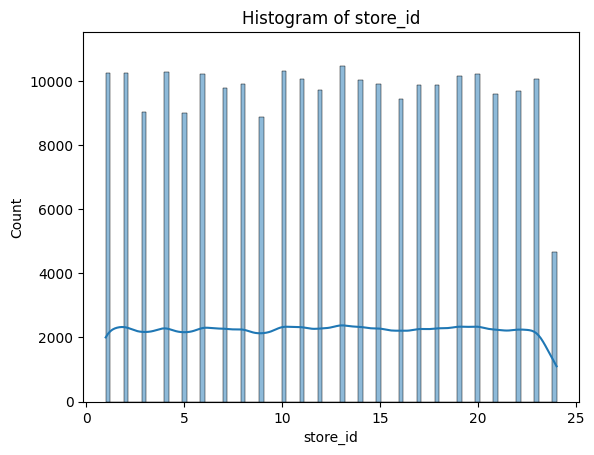

Description of store_id ~~~~~~~~~~
count    231522.000000
mean         12.260230
std           6.783404
min           1.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          24.000000
Name: store_id, dtype: float64

Value counts of store_id ~~~~~~~~~~
store_id
13    10474
10    10315
4     10272
1     10244
2     10238
20    10214
6     10211
19    10148
11    10062
23    10050
14    10040
15     9901
8      9895
17     9864
18     9859
7      9762
12     9705
22     9688
21     9582
16     9443
3      9036
5      8999
9      8867
24     4653
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of dept column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


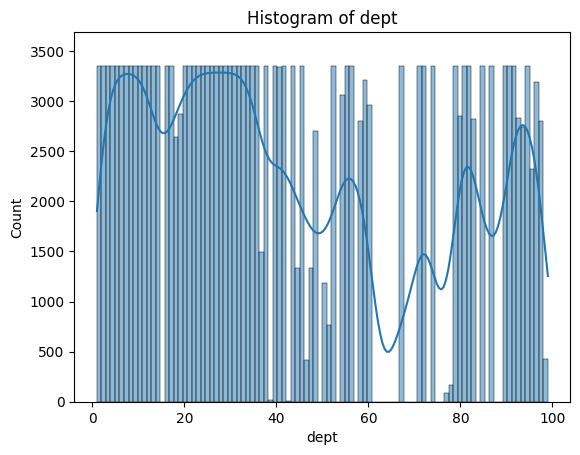

Description of dept ~~~~~~~~~~
count    231522.000000
mean         43.643122
std          29.736487
min           1.000000
25%          19.000000
50%          36.000000
75%          71.000000
max          99.000000
Name: dept, dtype: float64

Value counts of dept ~~~~~~~~~~
dept
26    3355
9     3355
87    3355
24    3355
35    3355
      ... 
47     417
78     165
77      85
39      15
43       4
Name: count, Length: 80, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of is_holiday column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


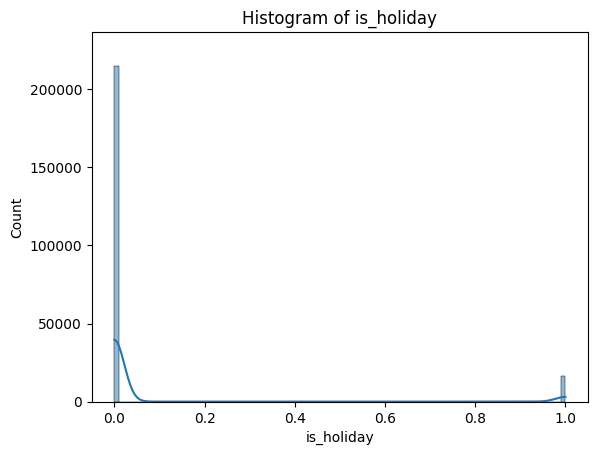

Description of is_holiday ~~~~~~~~~~
count    231522.000000
mean          0.070576
std           0.256117
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_holiday, dtype: float64

Value counts of is_holiday ~~~~~~~~~~
is_holiday
0    215182
1     16340
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of temperature column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


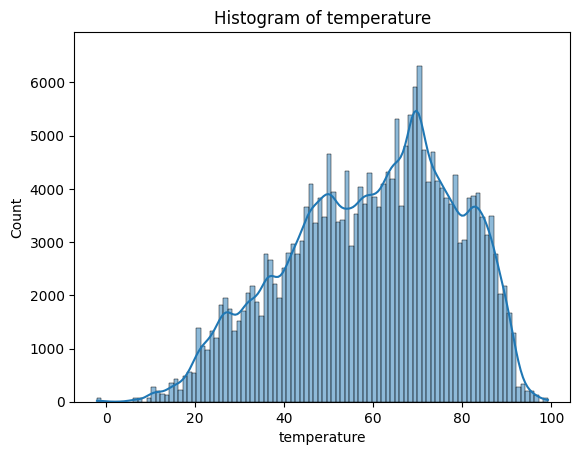

Description of temperature ~~~~~~~~~~
count    231522.000000
mean         59.766484
std          18.581044
min          -2.060000
25%          46.380000
50%          61.940000
75%          74.200000
max          99.220000
Name: temperature, dtype: float64

Value counts of temperature ~~~~~~~~~~
temperature
72.62    412
49.96    346
50.43    344
67.87    336
76.03    283
        ... 
83.66     60
79.65     59
85.02     59
91.10     59
86.85     58
Name: count, Length: 2614, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of fuel_price column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


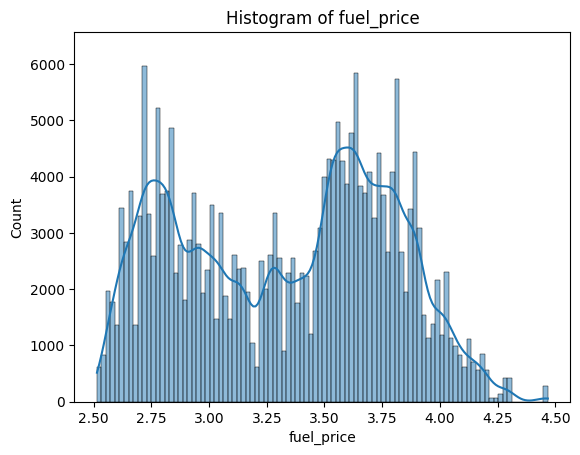

Description of fuel_price ~~~~~~~~~~
count    231522.000000
mean          3.335792
std           0.452468
min           2.514000
25%           2.909000
50%           3.407000
75%           3.705000
max           4.468000
Name: fuel_price, dtype: float64

Value counts of fuel_price ~~~~~~~~~~
fuel_price
3.638    1564
3.630    1436
3.891    1228
2.720    1222
3.594    1216
         ... 
3.824      67
2.949      66
3.223      66
3.094      66
4.003      65
Name: count, Length: 827, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of weekly_sales column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


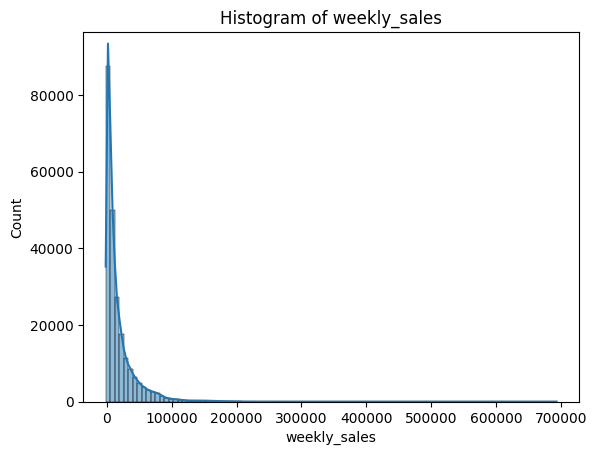

Description of weekly_sales ~~~~~~~~~~
count    231522.000000
mean      17687.873058
std       24667.125386
min       -1699.000000
25%        2789.362500
50%        8607.650000
75%       22167.310000
max      693099.360000
Name: weekly_sales, dtype: float64

Value counts of weekly_sales ~~~~~~~~~~
weekly_sales
10.47       120
10.00       114
11.47        89
15.00        87
11.97        86
           ... 
39954.04      1
15694.17      1
7024.95       1
2567.36       1
9677.34       1
Name: count, Length: 208858, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of cpi column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


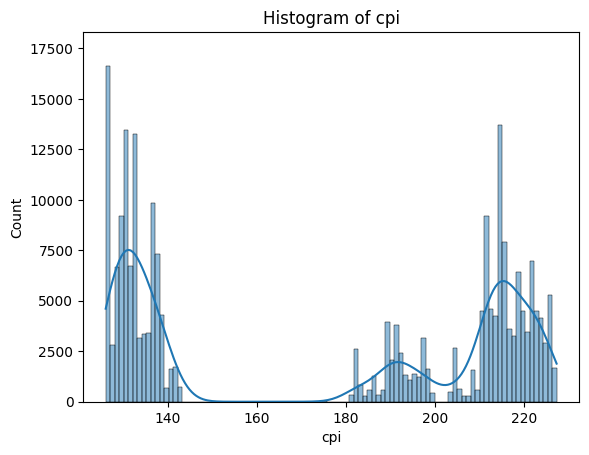

Description of cpi ~~~~~~~~~~
count    231522.000000
mean        175.236255
std          40.216596
min         126.064000
25%         132.497600
50%         189.842483
75%         214.915353
max         227.232807
Name: cpi, dtype: float64

Value counts of cpi ~~~~~~~~~~
cpi
126.526286    365
129.836400    363
126.442065    363
126.496258    363
126.604286    363
             ... 
214.139916     59
219.076855     59
215.119954     59
215.203976     58
175.236255     47
Name: count, Length: 1860, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of unemployment column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


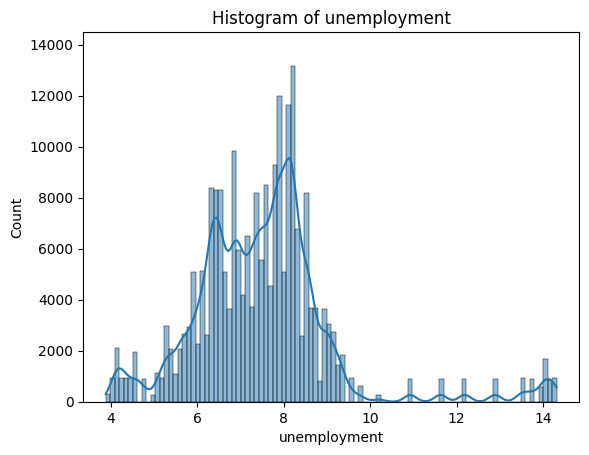

Description of unemployment ~~~~~~~~~~
count    231522.000000
mean          7.500052
std           1.647809
min           3.879000
25%           6.496000
50%           7.484000
75%           8.193000
max          14.313000
Name: unemployment, dtype: float64

Value counts of unemployment ~~~~~~~~~~
unemployment
8.099000     3586
7.866000     2780
7.343000     2597
8.067000     1960
7.806000     1954
             ... 
7.543000      274
10.199000     271
4.954000      251
5.422000      250
7.500052       37
Name: count, Length: 243, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of markdown1 column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


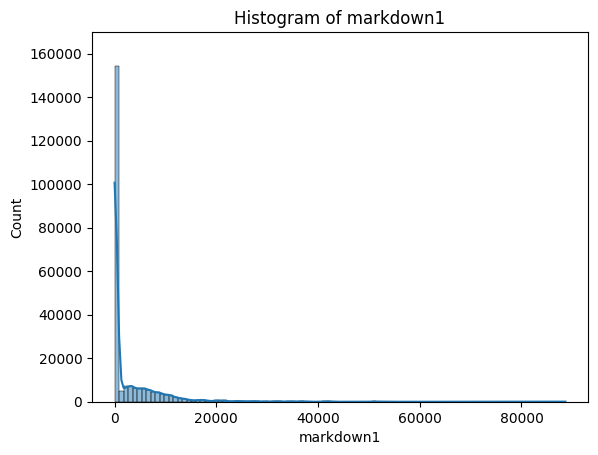

Description of markdown1 ~~~~~~~~~~
count    231522.000000
mean       2836.472565
std        6368.054841
min           0.000000
25%           0.000000
50%           0.000000
75%        3502.060000
max       88646.760000
Name: markdown1, dtype: float64

Value counts of markdown1 ~~~~~~~~~~
markdown1
0.00       150139
1483.17        75
9264.48        75
5924.71        75
686.24         75
            ...  
1471.06        61
2048.94        61
5211.69        61
2046.93        60
1649.56        60
Name: count, Length: 1174, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of markdown2 column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


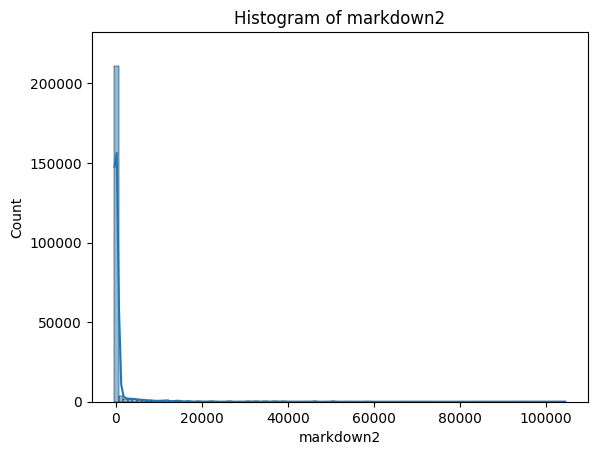

Description of markdown2 ~~~~~~~~~~
count    231522.000000
mean       1039.679692
std        5909.762392
min        -265.760000
25%           0.000000
50%           0.000000
75%           7.640000
max      104519.540000
Name: markdown2, dtype: float64

Value counts of markdown2 ~~~~~~~~~~
markdown2
 0.00      167062
 1.91         468
 19.00        276
 5.73         275
 56.00        220
            ...  
 49.00         61
 96.52         61
 142.20        61
 8.80          60
-10.98         60
Name: count, Length: 867, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of markdown3 column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


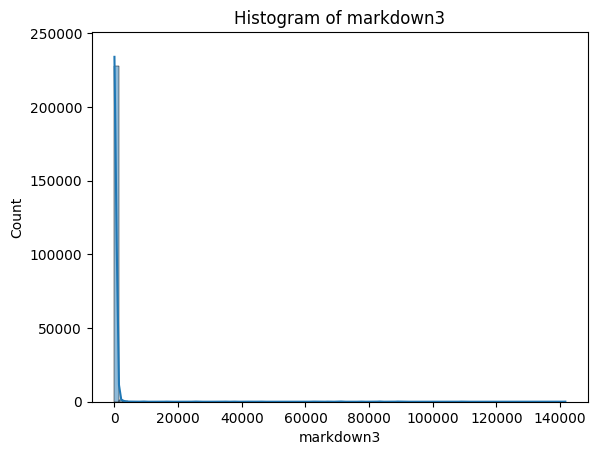

Description of markdown3 ~~~~~~~~~~
count    231522.000000
mean        574.579353
std        6398.583304
min           0.000000
25%           0.000000
50%           0.000000
75%           5.160000
max      141630.610000
Name: markdown3, dtype: float64

Value counts of markdown3 ~~~~~~~~~~
markdown3
0.00     156086
1.00        541
3.00        472
6.00        420
0.50        409
          ...  
68.00        61
0.36         61
52.06        61
13.00        61
9.61         61
Name: count, Length: 964, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of markdown4 column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


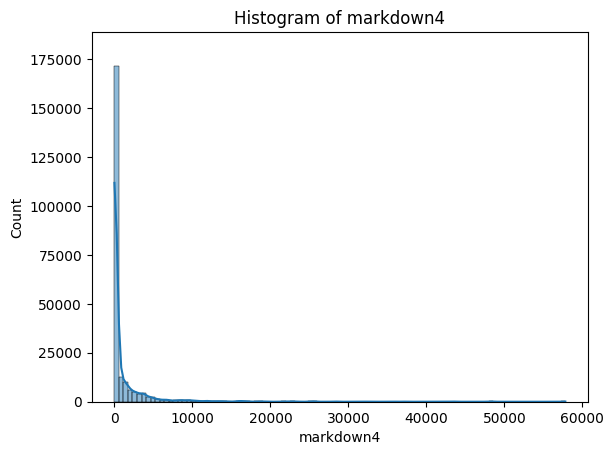

Description of markdown4 ~~~~~~~~~~
count    231521.000000
mean       1207.971874
std        4067.194966
min           0.000000
25%           0.000000
50%           0.000000
75%         643.780000
max       57817.560000
Name: markdown4, dtype: float64

Value counts of markdown4 ~~~~~~~~~~
markdown4
0.00       150808
3.00          146
2.00          143
8.00          140
14.00         137
            ...  
968.75         61
385.53         61
677.36         60
1955.75        60
NaN             1
Name: count, Length: 1158, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of size column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


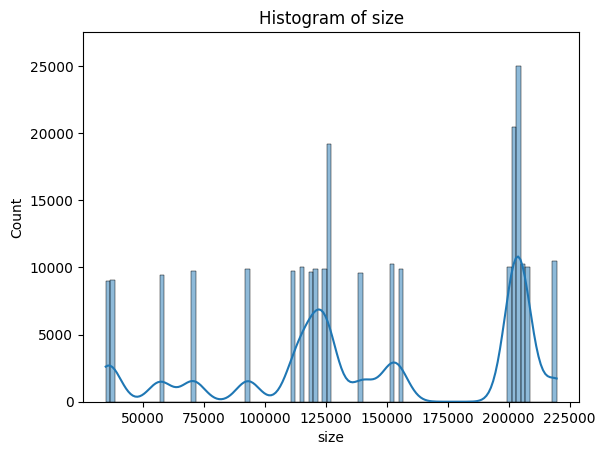

Description of size ~~~~~~~~~~
count    231521.000000
mean     143482.886010
std       56230.260627
min       34875.000000
25%      114533.000000
50%      140167.000000
75%      202505.000000
max      219622.000000
Name: size, dtype: float64

Value counts of size ~~~~~~~~~~
size
203819.0    14800
219622.0    10474
126512.0    10315
205863.0    10272
151315.0    10244
202307.0    10238
203742.0    10214
202505.0    10211
207499.0    10062
114533.0    10050
200898.0    10040
123737.0     9901
155078.0     9895
93188.0      9864
120653.0     9859
70713.0      9762
112238.0     9705
119557.0     9688
140167.0     9582
57197.0      9443
37392.0      9036
34875.0      8999
125833.0     8867
NaN             1
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of type column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


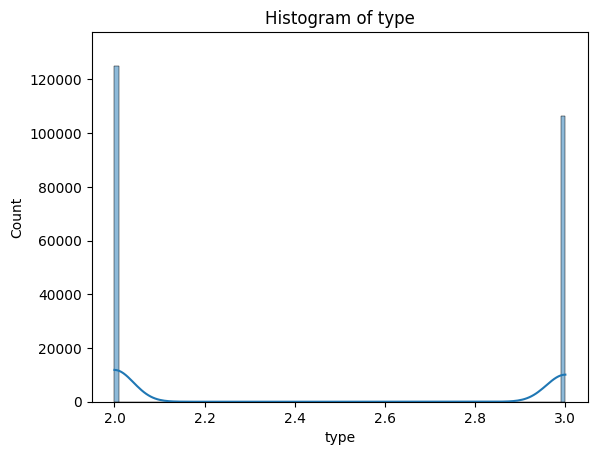

Description of type ~~~~~~~~~~
count    231521.000000
mean          2.459786
std           0.498381
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: type, dtype: float64

Value counts of type ~~~~~~~~~~
type
2.0    125071
3.0    106450
NaN         1
Name: count, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of month column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


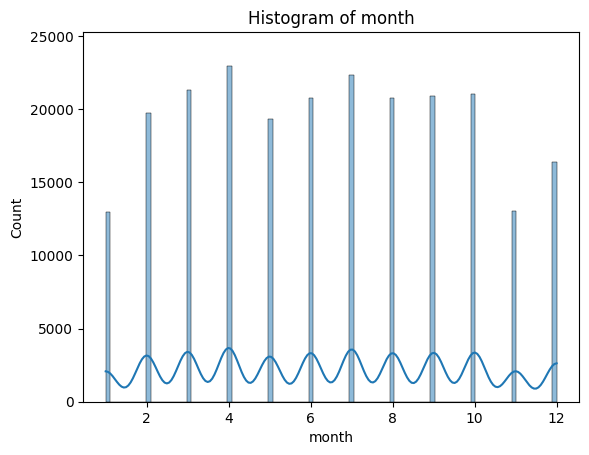

Description of month ~~~~~~~~~~
count    231483.000000
mean          6.436222
std           3.249947
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64

Value counts of month ~~~~~~~~~~
month
4.0     22968
7.0     22342
3.0     21304
10.0    21008
9.0     20889
6.0     20776
8.0     20747
2.0     19752
5.0     19295
12.0    16414
11.0    13005
1.0     12983
NaN        39
Name: count, dtype: int64



In [9]:

# %%

# My eda boilerplate - part 2 - numeric columns
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Function to explore numeric columns with sns.histplot
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def explore_numeric_cols(col, df):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'Exploration of {col} column')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    
    series = df[col].dropna()
    # Numeric branch
    nrows = len(df)
    if nrows < 10000:
        bins = 20
    else:  
        bins = 100

    # Compute histogram heights before plotting
    counts, edges = np.histogram(series, bins=bins)
    ymax = counts.max()  

    sns.histplot(series, bins=bins, kde=True)
    plt.ylim(0, ymax*1.10)
    plt.title(f'Histogram of {col}')
    plt.grid(False)
    plt.show()
        
    print(f'Description of {col} ~~~~~~~~~~')
    print(df[col].describe())
    print()
    print(f'Value counts of {col} ~~~~~~~~~~')
    print(df[col].value_counts(dropna=False))
    print()

for col in numeric_cols:
    explore_numeric_cols(col, df)




In [10]:

# %%

# My eda boilerplate - part 3 - categorical columns 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Function to explore categorical columns with sns.countplot
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def explore_categorical_cols(col, df):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'Exploration of {col} column')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    
 
    # Normal categorical branch
    unique_count = df[col].nunique()
    
    # Skip high-cardinality columns
    if unique_count > 100:
        print(f"Skipping {col} (unique values = {unique_count}, exceeds threshold of 100).")
        print()
        return
    
    plot_width = 8
    if unique_count <= 10:
        plot_height = 2
    elif unique_count <= 20:
        plot_height = 4
    else:
        plot_height = 8
    
    plt.figure(figsize=(plot_width, plot_height))
    
    max_count = df[col].value_counts().max()
    x_limit_max = max_count * 1.05
    
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index,
        color='gray'
    )
    plt.xlim(0, x_limit_max)
    plt.title(f'Bar Chart of {col}')
    plt.grid(axis='x')
    plt.show()
    
    print(f'Description of {col} ~~~~~~~~~~')
    print(df[col].describe())
    print()
    print(f'Value counts of {col} ~~~~~~~~~~')
    print(df[col].value_counts(dropna=False))
    print()


# Loop through categorical columns
for col in categorical_cols:
    explore_categorical_cols(col, df)




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of date column
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Skipping date (unique values = 143, exceeds threshold of 100).



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Exploration of DATE column: date
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


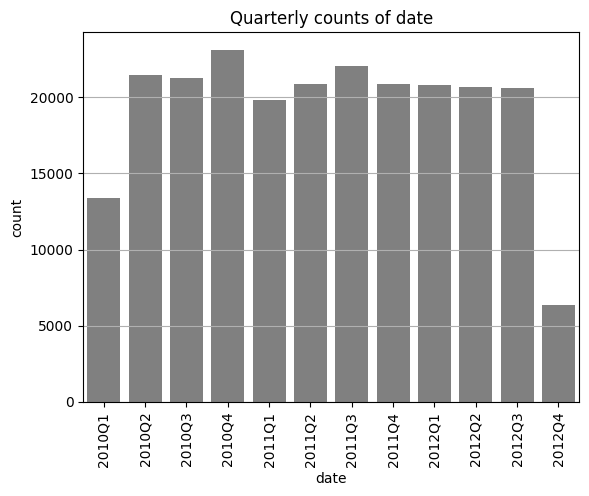

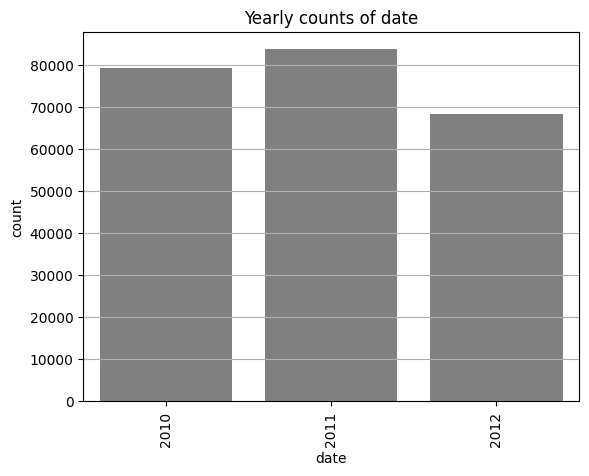

Summary of date ~~~~~~~~~~
Min date: 2010-02-05 00:00:00
Max date: 2012-10-26 00:00:00

count                           231483
mean     2011-06-12 07:06:55.095709440
min                2010-02-05 00:00:00
25%                2010-10-08 00:00:00
50%                2011-06-10 00:00:00
75%                2012-02-17 00:00:00
max                2012-10-26 00:00:00
Name: date, dtype: object

Value counts of date (by quarter) ~~~~~~~~~~
date
2010Q4    23135
2011Q3    22064
2010Q2    21464
2010Q3    21298
2011Q2    20912
2011Q4    20910
2012Q1    20789
2012Q2    20663
2012Q3    20616
2011Q1    19844
2010Q1    13406
2012Q4     6382
Name: count, dtype: int64

Summary of date ~~~~~~~~~~
Min date: 2010-02-05 00:00:00
Max date: 2012-10-26 00:00:00

Value counts of date (by quarter) ~~~~~~~~~~
date
2010-02-19    1693
2010-03-12    1679
2010-02-12    1676
2010-02-26    1674
2010-02-05    1673
              ... 
2011-07-08    1569
2011-07-01    1568
2011-07-15    1565
2011-07-29    1562
2011-07-22    1

In [23]:

# %%
# My eda boilerplate - part 4 - date columns
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Function to explore date columns with sns.countplot
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def explore_date_col(col, df):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'Exploration of DATE column: {col}')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    # Only extract the column you need
    series = df[col].dropna()

    # Compute quarter without copying the full df
    quarter = series.dt.to_period('Q').astype(str)

    sns.countplot(
        x=quarter,
        order=sorted(quarter.unique()),
        color='gray'
    )
    plt.title(f'Quarterly counts of {col}')
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    plt.show()

    year = series.dt.to_period('Y').astype(str)
    
    sns.countplot(
        x=year,
        order=sorted(year.unique()),
        color='gray'
    )
    plt.title(f'Yearly counts of {col}')
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    plt.show()

    print(f"Summary of {col} ~~~~~~~~~~")
    print(f"Min date: {series.min()}")
    print(f"Max date: {series.max()}")
    print()
    print(series.describe())
    print()

    print(f"Value counts of {col} (by quarter) ~~~~~~~~~~")
    print(quarter.value_counts(dropna=False))
    print()


    # Summary stats
    print(f"Summary of {col} ~~~~~~~~~~")
    print(f"Min date: {df[col].min()}")
    print(f"Max date: {df[col].max()}")
    print()

    # Quarter value counts
    print(f"Value counts of {col} (by quarter) ~~~~~~~~~~")
    print(series.value_counts(dropna=False))
    print()


for col in date_cols:
    explore_date_col(col, df2)


print ("End of EDA.", "~"*10)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Weekly exploration of DATE column: date
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


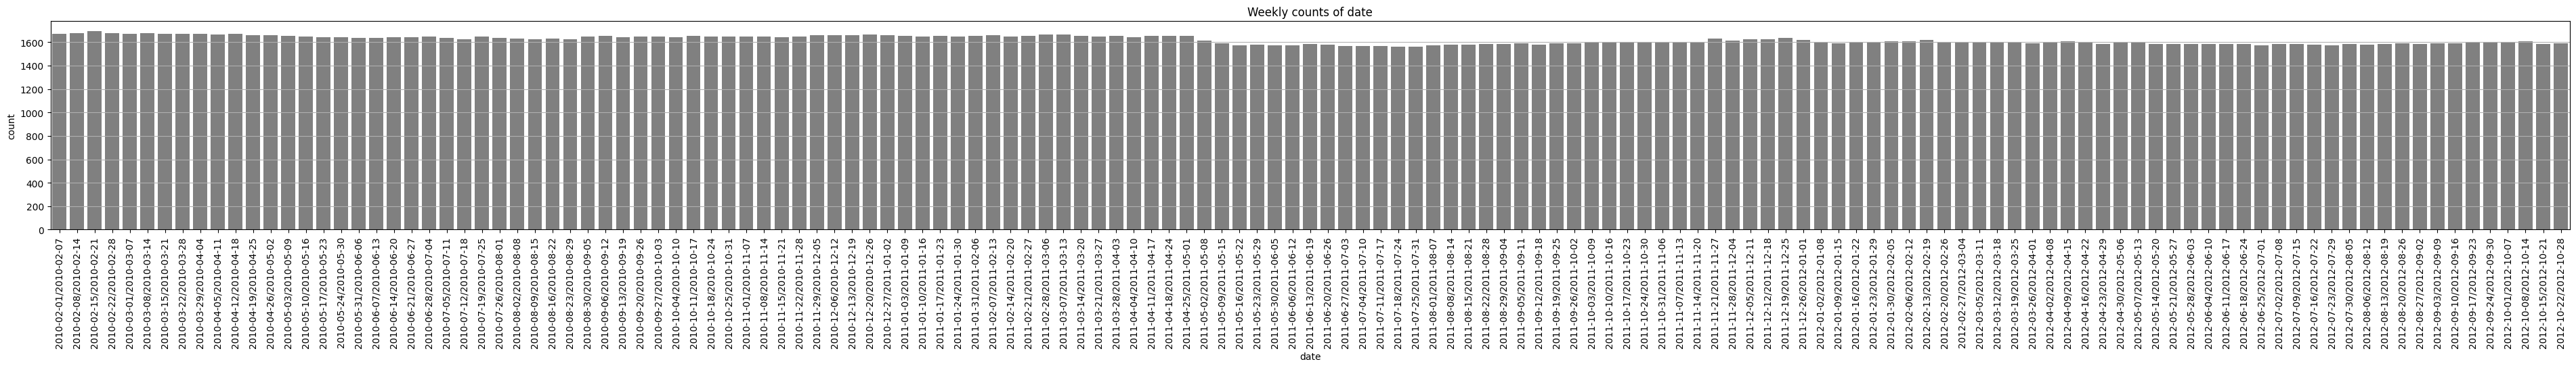

Value counts of date (by week) ~~~~~~~~~~
date
2010-02-01/2010-02-07    1673
2010-02-08/2010-02-14    1676
2010-02-15/2010-02-21    1693
2010-02-22/2010-02-28    1674
2010-03-01/2010-03-07    1672
                         ... 
2012-09-24/2012-09-30    1594
2012-10-01/2012-10-07    1596
2012-10-08/2012-10-14    1609
2012-10-15/2012-10-21    1586
2012-10-22/2012-10-28    1591
Name: count, Length: 143, dtype: int64



In [27]:
def df_explore_date_by_week(col, df):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(f'Weekly exploration of DATE column: {col}')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    series = df[col].dropna()
    week = series.dt.to_period('W').astype(str)

    unique_weeks = sorted(week.unique())
    n_weeks = len(unique_weeks)

    # Dynamic width logic
    # Base width = 24
    # If more than 24 unique weeks, widen to 48
    if n_weeks > 24:
        fig_width = 48
    else:
        fig_width = 24

    # x axis limits for categorical positions
    x_min = -0.5
    x_max = n_weeks - 0.5

    plt.figure(figsize=(fig_width, 4))

    sns.countplot(
        x=week,
        order=unique_weeks,
        color='gray'
    )
    plt.title(f'Weekly counts of {col}')
    plt.xlim(x_min, x_max)
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    plt.show()

    print(f"Value counts of {col} (by week) ~~~~~~~~~~")
    print(week.value_counts(dropna=False).sort_index())
    print()

for col in date_cols:
    df_explore_date_by_week(col, df2)


In [ ]:
# Verify if the data are weekly data by grouping dates 
df_grp_dates = df.groupby("date")["fact_id"].count().reset_index()
df_grp_dates

,date,fact_id
0,2010-02-05,1673
1,2010-02-12,1676
2,2010-02-19,1693
3,2010-02-26,1674
4,2010-03-05,1672
...,...,...
138,2012-09-28,1594
139,2012-10-05,1596
140,2012-10-12,1609
141,2012-10-19,1586
